### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

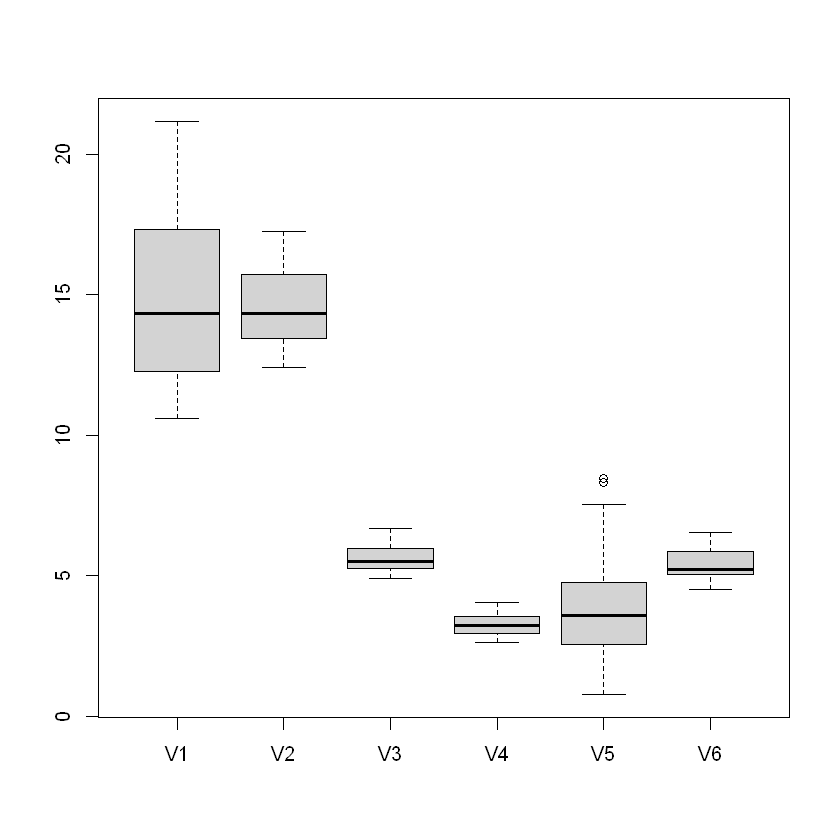

In [3]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

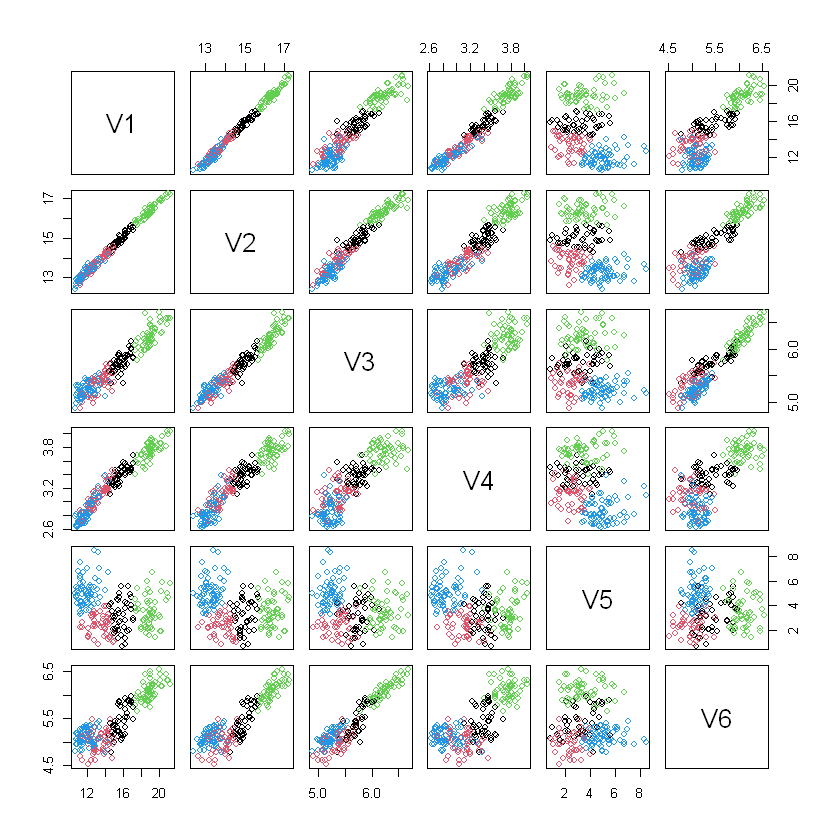

In [4]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,0.6362517,0.3177031,0.12251442,0.05021075,-0.0084876163,-0.025890456
2,-1.1731198,1.0501576,0.10256003,0.05800065,-0.0041432679,0.001410480
3,3.0936321,-0.2499533,-0.04446158,-0.04386905,0.0115749668,0.013458399
4,-2.1376924,-0.7392228,-0.11677986,-0.03800567,-0.0009242843,0.005265824


K-means clustering with 4 clusters of sizes 44, 46, 54, 66

Cluster means:
        V1       V2       V3       V4       V5       V6
1 15.71909 14.97659 5.745182 3.398500 3.187045 5.448386
2 13.39109 13.86522 5.366000 3.114283 2.415804 4.990674
3 18.96296 16.39667 6.242722 3.749926 3.540333 6.100778
4 11.91439 13.26152 5.231227 2.863939 5.068288 5.105348

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   3   1   4   1   2   1   2   3   2   4   1   1   1   3   4   4   1   1   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  4   3   1   4   4   1   4   2   2   3   1   2   4   1   3   3   3   4   1   4 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   4   3   2   4   3   3   4   4   4   3   2   1   4   1   2   1   1   3   4 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   3   2   1   3   2   3   1   3   4   3   2   1   3   

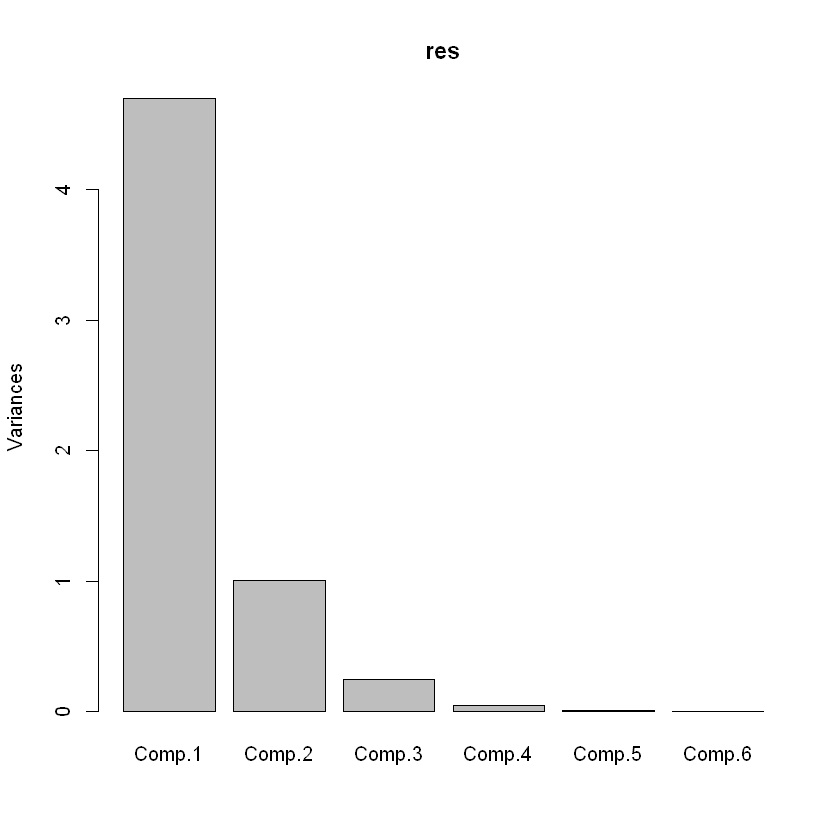

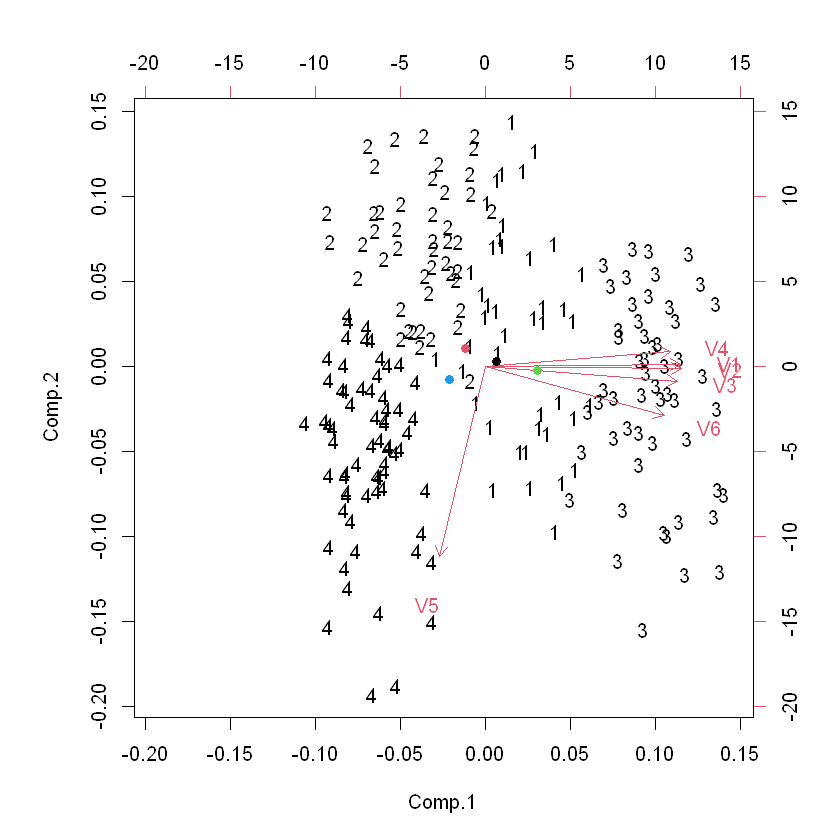

In [5]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


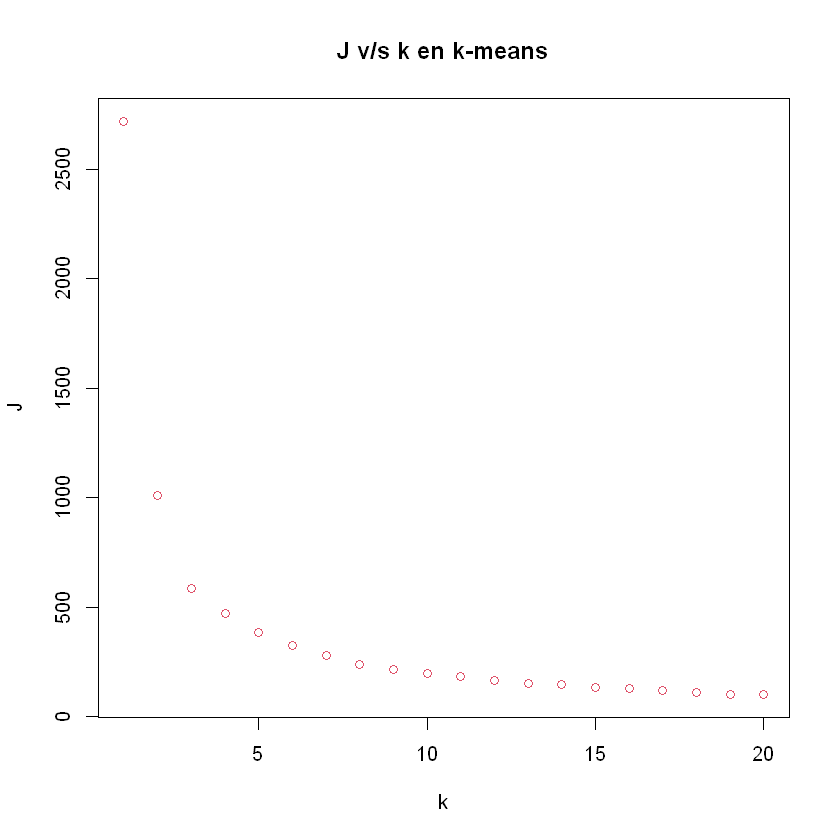

In [6]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.


El valor mas apropiado para K es 3, ya que despues de k=3 la curva comienza a aplanarse. para escoger el k mas optimo hay que usar el valor que este mas cercano al "codo" de la funcion.

2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

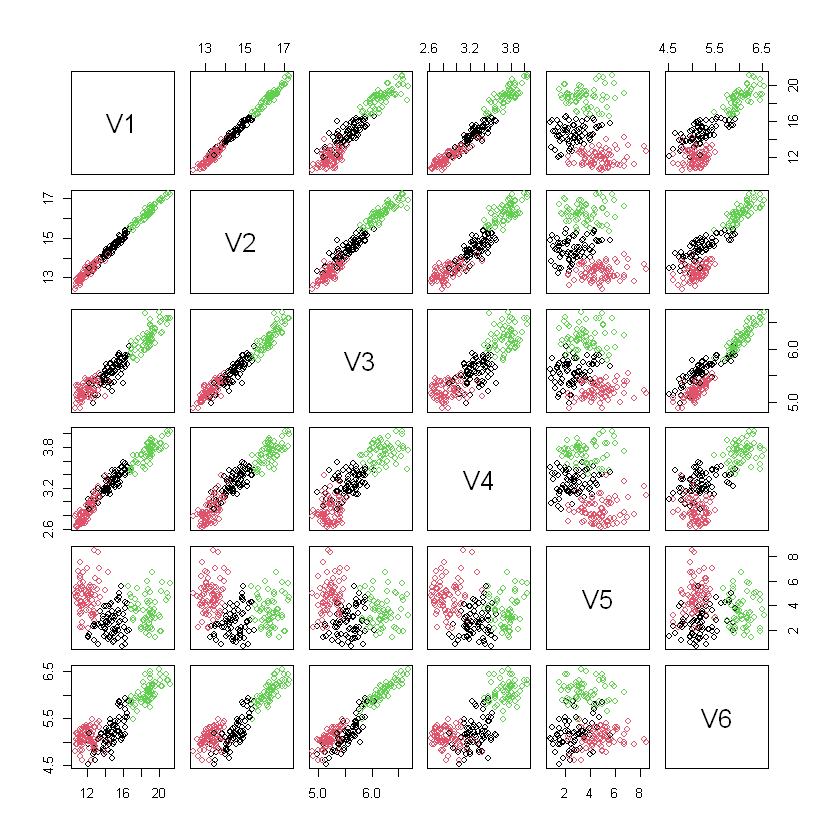

In [10]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)


#comparado con el k anterior que era 4 se pueden observar la distribuicion en 3 grupos (negro,rojo y verde) ahora no tenemos valores tan dispersos
#como en el k anterior.

## Otras alternativas de cálculo

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



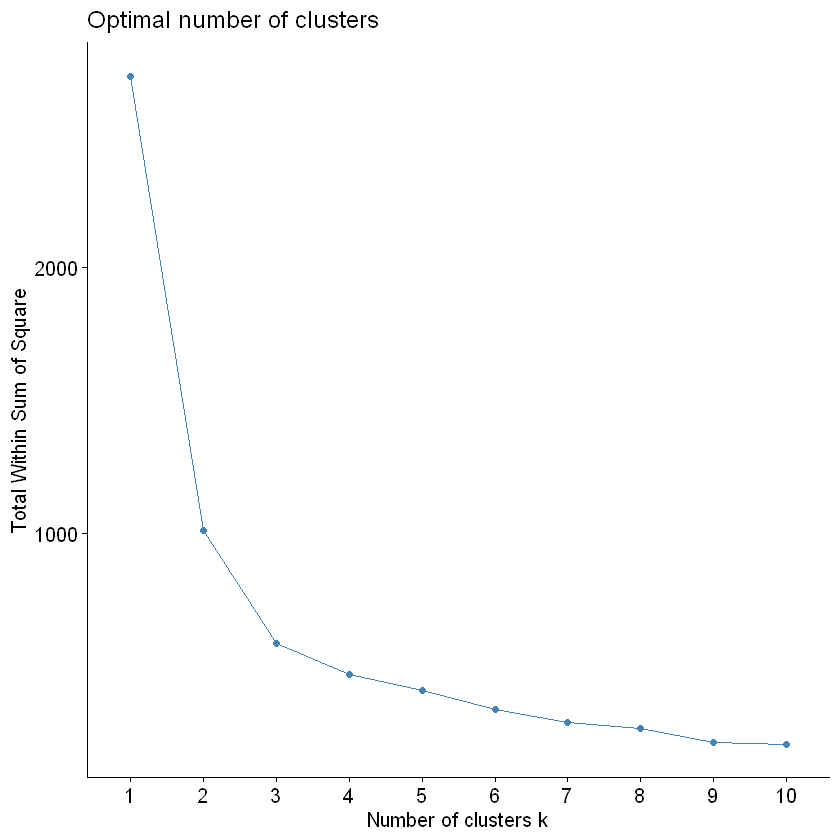

In [13]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


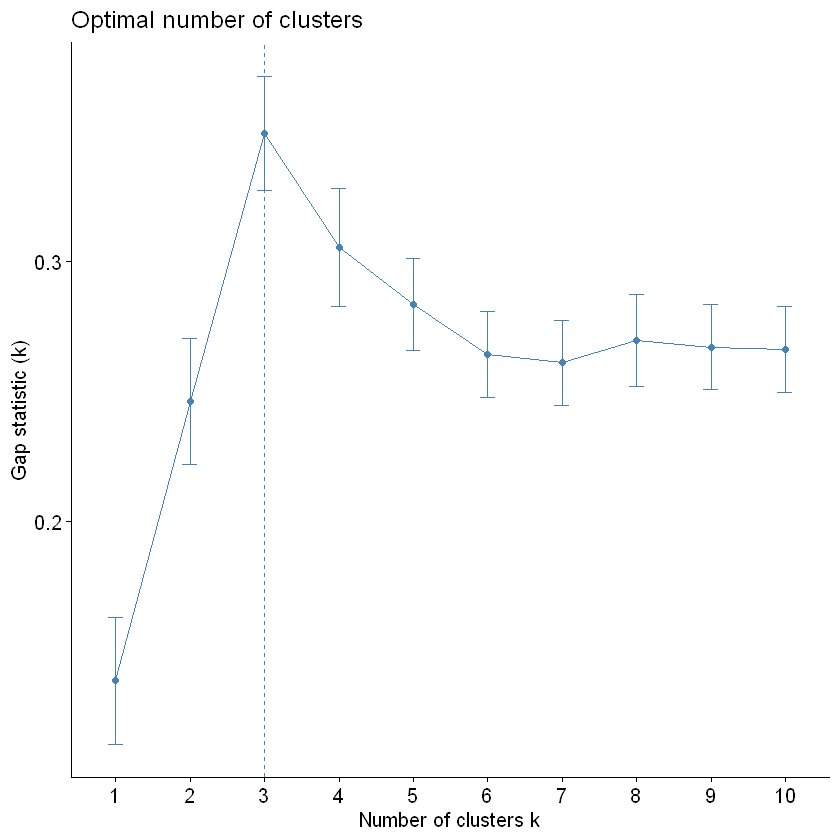

In [14]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

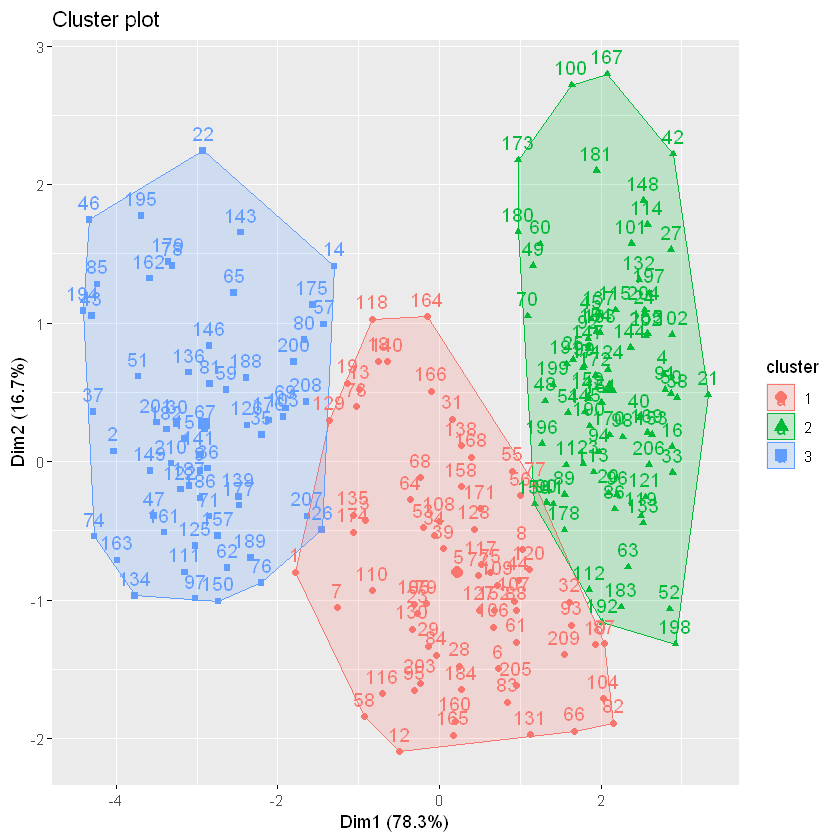

In [15]:
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con las 11 características (correspondiente a las columnas 4 a la 14)  en el archivo tiposMusica.csv. Si es necesario, filtre sus datos considerando las conclusiones del análisis exploratorio de la tarea de PCA.

1.Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

In [38]:
#Tenemos 11 caracteristicas para analizar
#popularidad #acustica #bailabilidad #duracion en ms #energia #instrumentalidad #vitalidad #sonoridad #speechiness #tempo #valance 
#el cluster en este caso seria para identificar variables con caracteristicas similares, que tanta energia tienen, que tan bailables son, cual es
#mas popular que otra y esto relacionandolas. esto para entender la diversidad que existe dentro de la musica con patrones que no son tan evidentes
#a simple vista.

In [19]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

In [20]:
datosC[1:10,4:14]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
2,13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
3,2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
4,32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
5,29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
6,25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
7,0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
8,0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
9,23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356


In [22]:
print(head(datosC))
print(summary(datosC))


      genre             artist_name
1 Classical Wolfgang Amadeus Mozart
2 Classical Wolfgang Amadeus Mozart
3 Classical Wolfgang Amadeus Mozart
4 Classical         Fr‚d‚ric Chopin
5 Classical         Fr‚d‚ric Chopin
6 Classical         Fr‚d‚ric Chopin
                                                           track_name
1                        Grabmusik, K. 42: III. Geliebte Seel' (Live)
2 Requiem in D Minor, K. 626: IIIb. Sequence No. 2, Tuba mirum (Live)
3                          12 Duets (No. 10 Andante) - Violin Version
4                             Mazurkas, Op. 50: No. 2 in A-Flat Major
5               M‚lodies Polonaises, Op. 74: No. 9, Melodia (Lamento)
6                  Preludes, Op. 28: No. 12 in G-Sharp Minor (Presto)
  popularity acousticness danceability duration_ms energy instrumentalness
1         14        0.942        0.350       79333 0.0761         0.00e+00
2         13        0.991        0.236      261000 0.0753         3.15e-03
3          2        0.994        

2.Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 

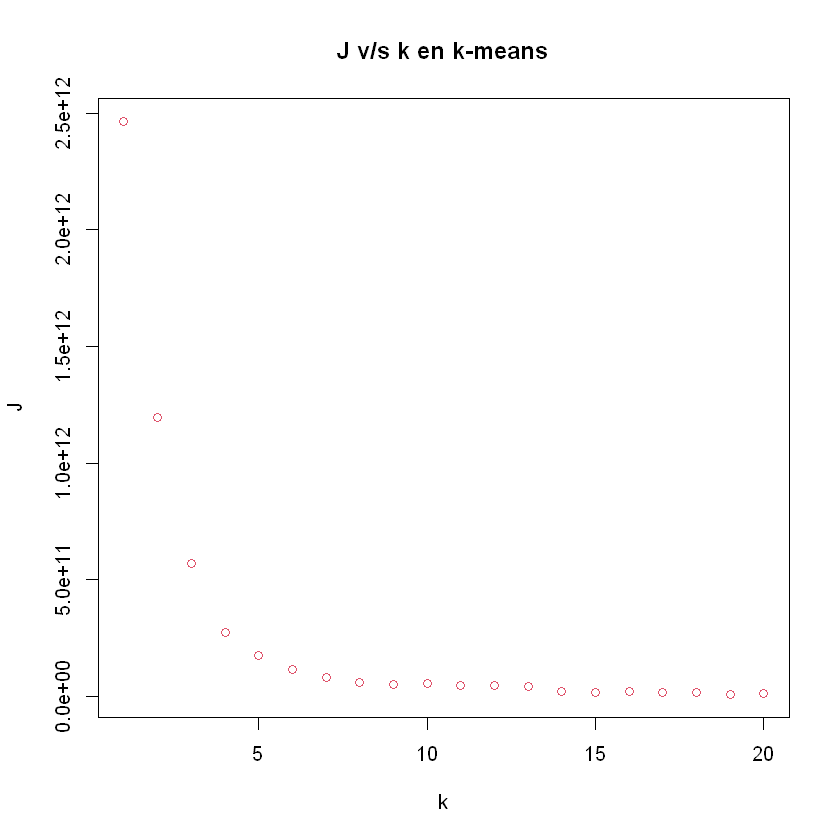

In [35]:
datoscluster <- datosC[4:14]
J <- rep(0, 20)
fin_iter <- 20

for (k in 1:fin_iter) {
  cl <- kmeans(datoscluster, k, iter.max = 1000, nstart = 10)
  J[k] <- cl$tot.withinss
}

plot(1:fin_iter, J, xlab = "k", ylab = "J", type = "p", main = "J v/s k en k-means", col = 2)

#el mejor k mas optimo seria 4


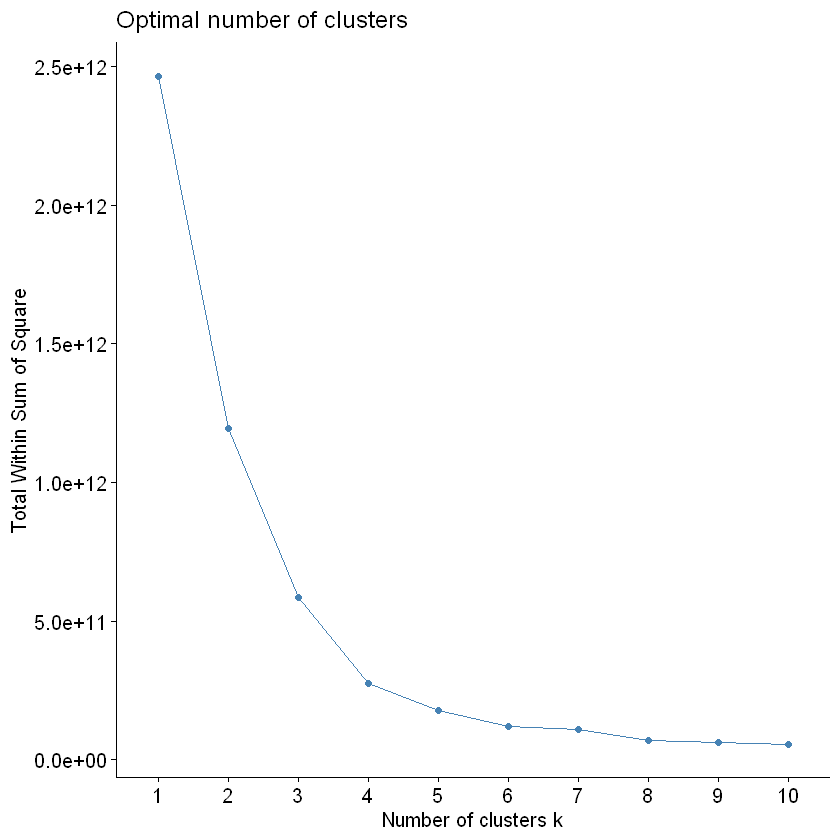

In [32]:
library(cluster)
library(factoextra)
df <- data.frame(datoscluster)
fviz_nbclust(df, kmeans, method = "wss")

3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados

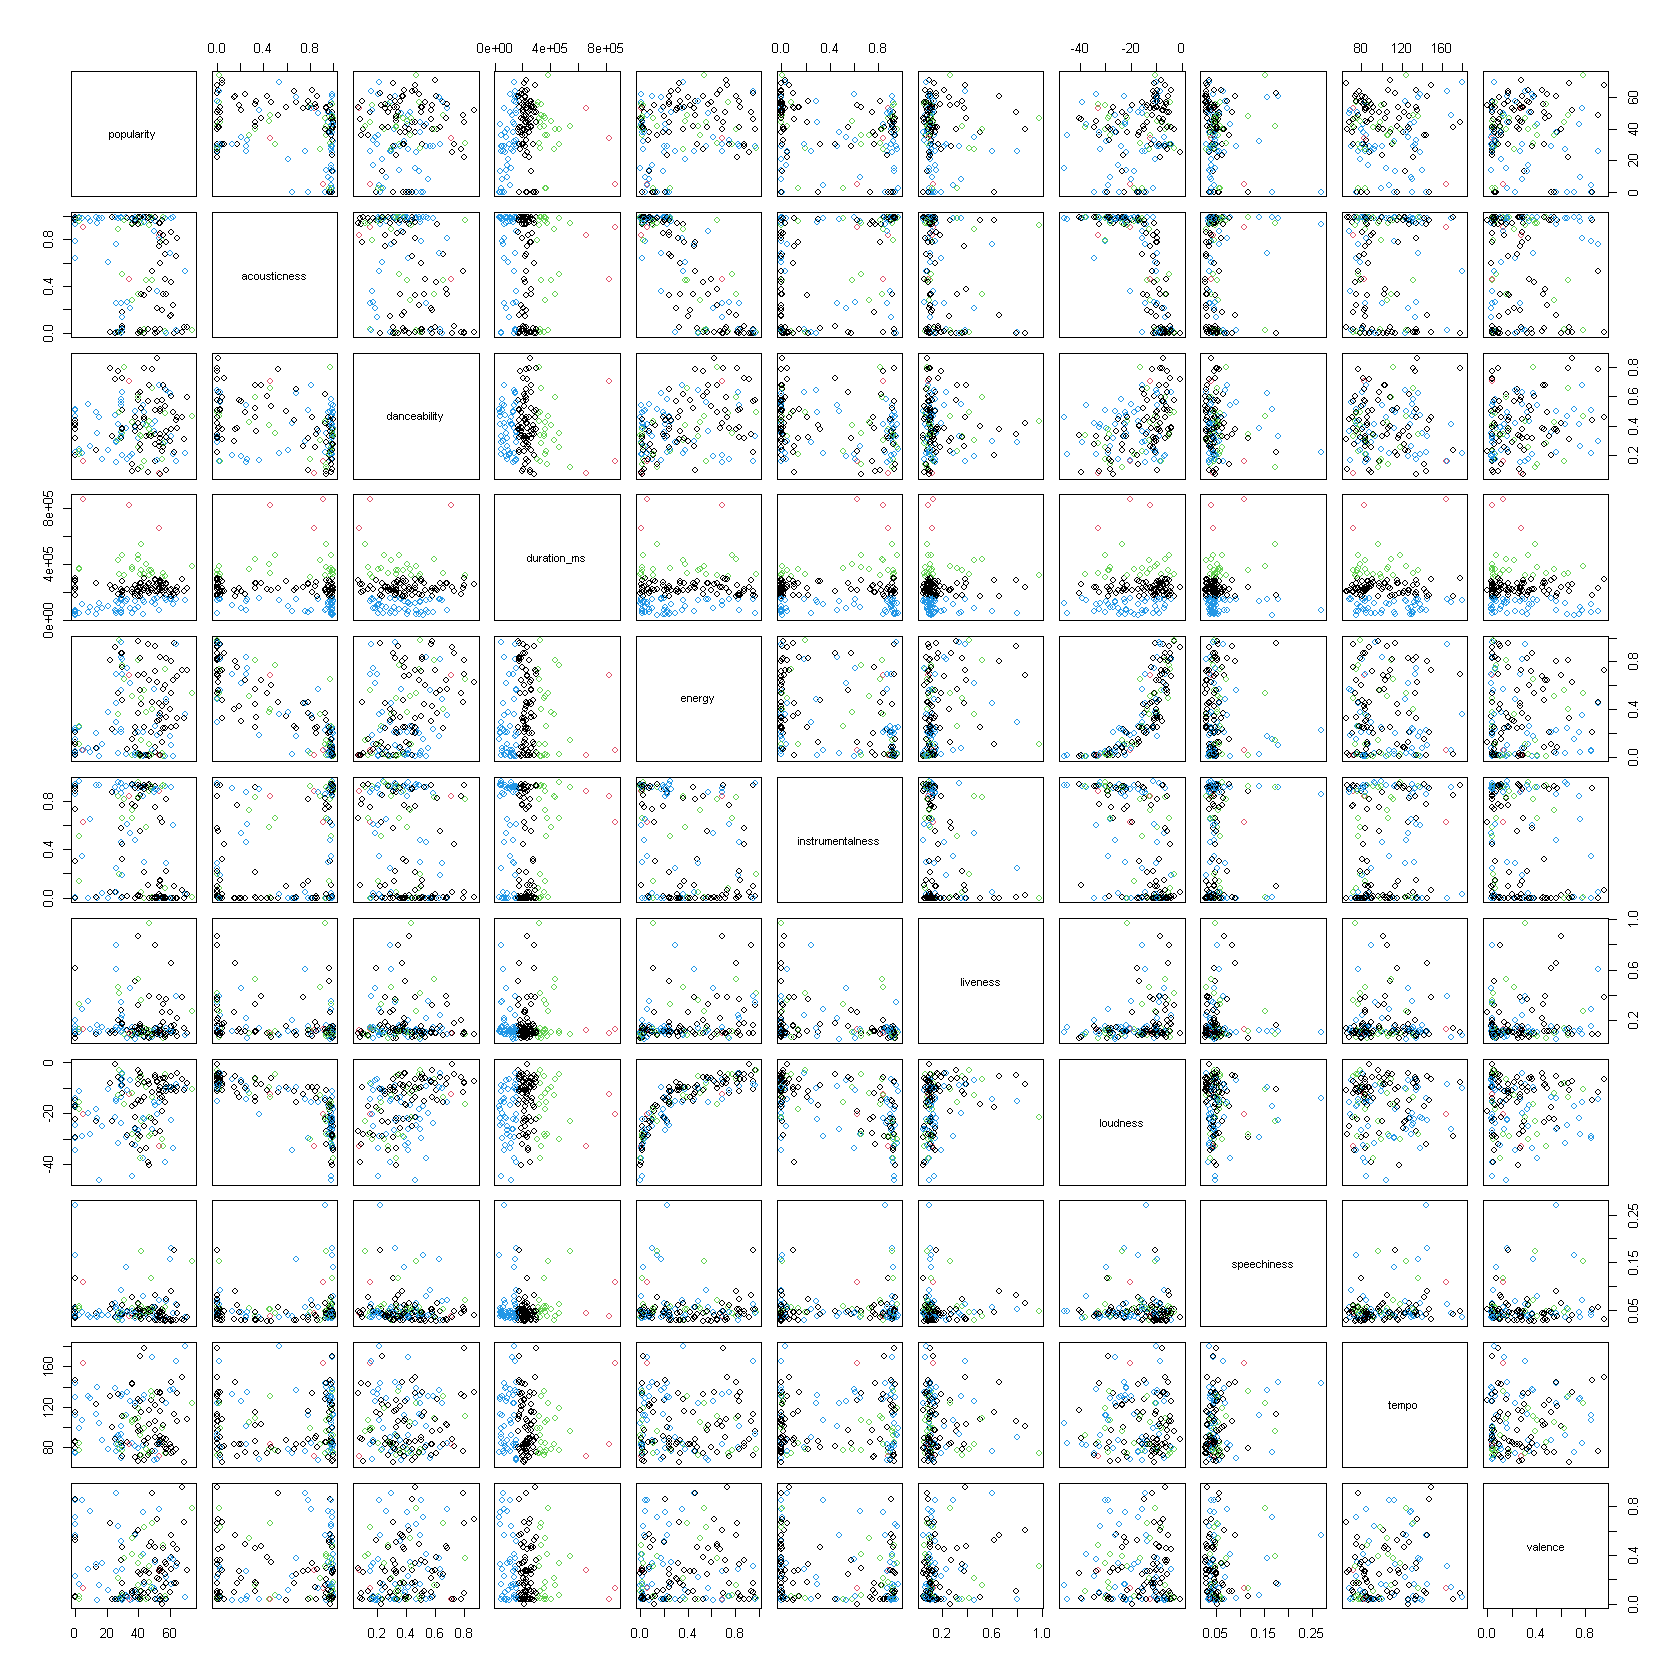

In [41]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datoscluster,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
options(repr.plot.width=14, repr.plot.height=14)
pairs(datoscluster,col=cl$cluster)


1. En los datos obtenidos podemos notar en el caso de la variable de duracion en ms que 3 valores que son continuos respecto a la duracion de la musisca excepto en 3 canciones que serian representadas por los puntos rojos que tienen mayor duracion.
2. 